In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [5]:
torch.__version__

'2.3.0+cu118'

In [6]:
# Create a dataset
# Create known parameters
weight = 0.1
bias = 0.1

# Create a dataset
start=0
end=1
step=0.01
x = torch.arange(start, end, step)
y = weight*x + bias

In [8]:
x[:10], y[:10]

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
         0.0900]),
 tensor([0.1000, 0.1010, 0.1020, 0.1030, 0.1040, 0.1050, 0.1060, 0.1070, 0.1080,
         0.1090]))

In [13]:
train_split=int(0.8*len(x))
X_train = x[:train_split]
y_train = y[:train_split]

X_test = x[train_split:]
y_test = y[train_split:]

len(X_train), len(X_test),len(y_train), len(y_test)

(80, 20, 80, 20)

In [18]:
## Function to plot the data
def plot_data(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test):
    plt.figure(figsize=(15,6))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    plt.legend()
    plt.show()

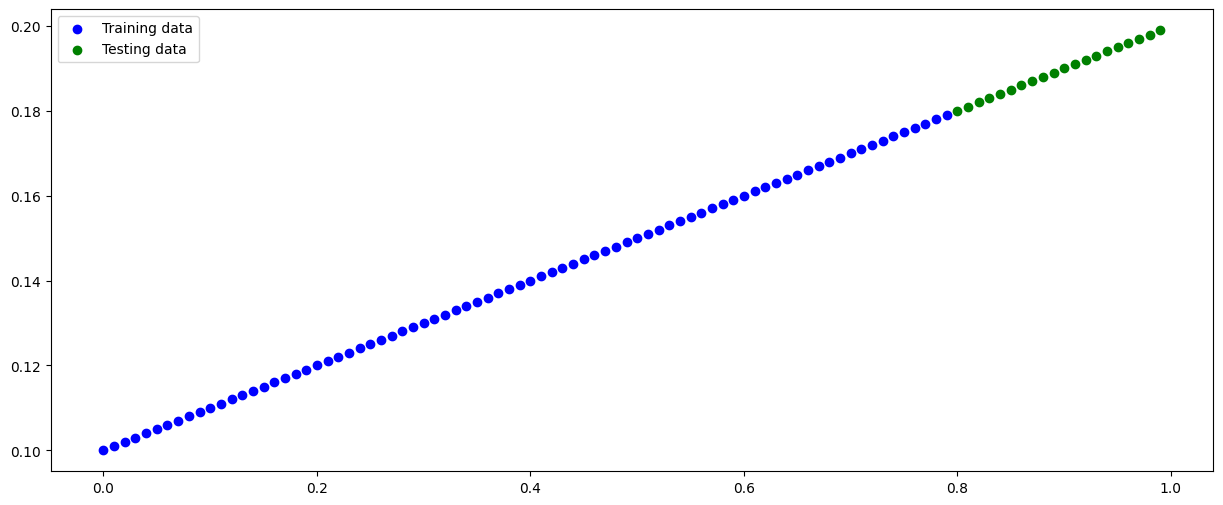

In [19]:
plot_data()

In [20]:
# Create a model
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))


    def forward(self, x: torch.Tensor):
        return self.weights*x + self.bias


In [22]:
torch.manual_seed(42)

In [23]:
model = LinearModel()

In [24]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [26]:
with torch.inference_mode():
    y_pred = model(X_test)

In [29]:
print(f"Number of test samples: {len(X_test)}")
print(f"Number of predictions: {len(y_pred)}")
print(f"y_test: {X_test}")
print(f"Predictions: {y_pred}")

Number of test samples: 20
Number of predictions: 20
y_test: tensor([0.8000, 0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800,
        0.8900, 0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700,
        0.9800, 0.9900])
Predictions: tensor([0.3982, 0.4015, 0.4049, 0.4083, 0.4116, 0.4150, 0.4184, 0.4217, 0.4251,
        0.4285, 0.4318, 0.4352, 0.4386, 0.4419, 0.4453, 0.4487, 0.4520, 0.4554,
        0.4588, 0.4621])


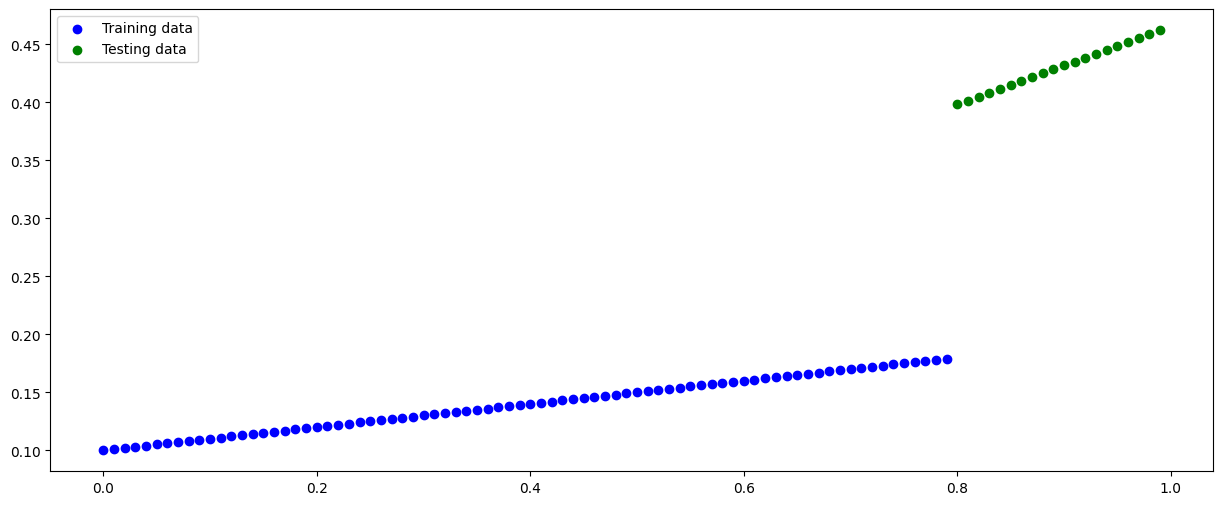

In [33]:
plot_data(X_train, y_train, X_test, y_pred.detach())

In [34]:
y_test - y_pred

tensor([-0.2182, -0.2205, -0.2229, -0.2253, -0.2276, -0.2300, -0.2324, -0.2347,
        -0.2371, -0.2395, -0.2418, -0.2442, -0.2466, -0.2489, -0.2513, -0.2537,
        -0.2560, -0.2584, -0.2608, -0.2631])

In [35]:
loss_fn=nn.L1Loss()
loss=loss_fn(y_pred, y_test)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [36]:
loss

tensor(0.2406)

train
forward pass
loss
optimizer zero grad
backward pass
optimizer step
repeat
test
with torch.no_grad():
    forward pass
    loss
    repeat
    calculate metrics
    print metrics
    repeat
    save model
    load model
    repeat
    inference
    forward pass
    repeat
    save predictions
    repeat
    visualize
    plot metrics
    plot predictions

In [42]:
torch.manual_seed(42)
epochs=200
train_losses=[]
test_losses=[]
epoch_count=[]

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    y_test_pred = model(X_test)
    test_loss = loss_fn(y_test_pred, y_test)
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())
    epoch_count.append(epoch)
    print(f"Epoch: {epoch} Training loss: {loss.item()} Testing loss: {test_loss.item()}")
    if test_loss < 0.01:
        break

Epoch: 0 Training loss: 0.02708452381193638 Testing loss: 0.06328494101762772
Epoch: 1 Training loss: 0.02674204111099243 Testing loss: 0.0621761791408062
Epoch: 2 Training loss: 0.026400094851851463 Testing loss: 0.06141138821840286
Epoch: 3 Training loss: 0.02605738677084446 Testing loss: 0.06064659357070923
Epoch: 4 Training loss: 0.025714680552482605 Testing loss: 0.05988180637359619
Epoch: 5 Training loss: 0.02537197433412075 Testing loss: 0.059117019176483154
Epoch: 6 Training loss: 0.025029268115758896 Testing loss: 0.05835222452878952
Epoch: 7 Training loss: 0.024686560034751892 Testing loss: 0.05758743733167648
Epoch: 8 Training loss: 0.024343853816390038 Testing loss: 0.056822650134563446
Epoch: 9 Training loss: 0.024001846089959145 Testing loss: 0.05571389198303223
Epoch: 10 Training loss: 0.023659422993659973 Testing loss: 0.05494910478591919
Epoch: 11 Training loss: 0.02331671491265297 Testing loss: 0.054184310138225555
Epoch: 12 Training loss: 0.022974006831645966 Testing

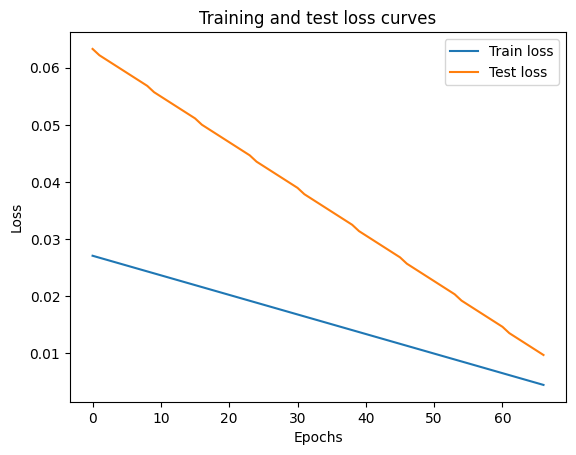

In [43]:
# Plot the loss curves
plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, test_losses, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [45]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.1206]), 'bias': tensor([0.0913])})

And the original values for weights and bias are:
weights: 0.1, bias: 0.1


In [47]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)
y_pred


tensor([0.1878, 0.1890, 0.1902, 0.1914, 0.1926, 0.1938, 0.1950, 0.1962, 0.1974,
        0.1986, 0.1998, 0.2010, 0.2022, 0.2034, 0.2046, 0.2058, 0.2070, 0.2083,
        0.2095, 0.2107])

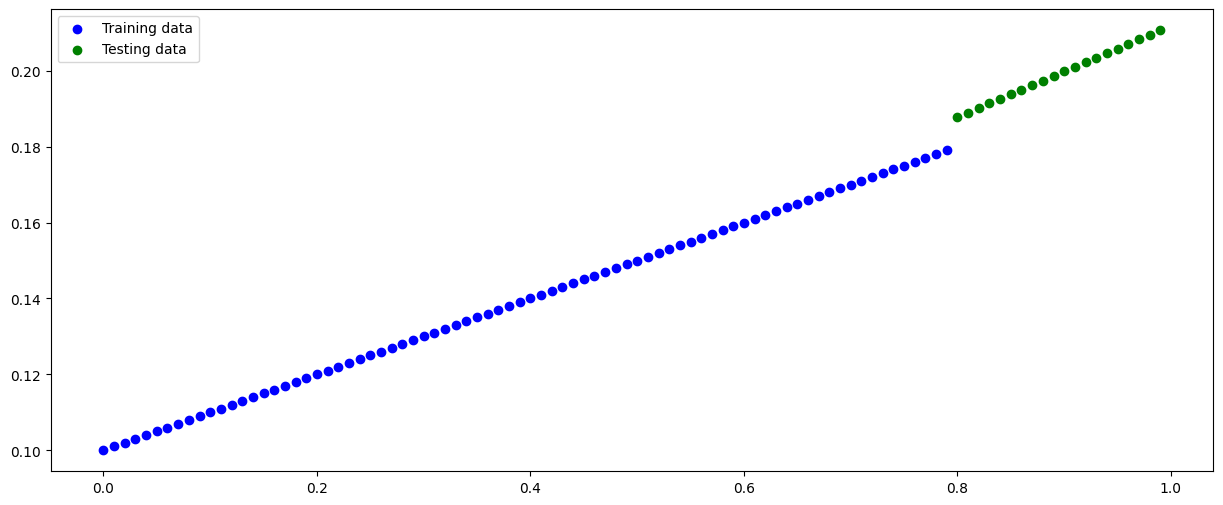

In [48]:
plot_data(X_train, y_train, X_test, y_pred.detach())

In [50]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_0.pth
